In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [45]:
 class KMeansClassifier():
    "this is a k-means classifier"  
    def __init__(self, k=3, initCent='random', max_iter=500):

        self._k = k
        self._initCent = initCent
        self._max_iter = max_iter
        self._clusterAssment = None
        self._labels = None
        self._sse = None

    def _calEDist(self, arrA, arrB):
        """
        功能：欧拉距离距离计算
        输入：两个一维数组
        """
        return np.math.sqrt(sum(np.power(arrA - arrB, 2)))

    def _calMDist(self, arrA, arrB):
        """
        功能：曼哈顿距离距离计算
        输入：两个一维数组
        """
        return sum(np.abs(arrA - arrB))

    def _randCent(self, data_X, k):
        """
        功能：随机选取k个质心
        输出：centroids # 返回一个m*n的质心矩阵
        """
        n = data_X.shape[1]  # 获取特征的维数
        centroids = np.empty((k, n))  # 使用numpy生成一个k*n的矩阵，用于存储质心
        for j in range(n):
            minJ = min(data_X[:, j])
            rangeJ = float(max(data_X[:, j] - minJ))
            # 使用flatten拉平嵌套列表(nested list)
            centroids[:, j] = (minJ + rangeJ * np.random.rand(k, 1)).flatten()
        return centroids
    
    def fit(self, data_X):
        """
        输入：一个m*n维的矩阵
        """
        if not isinstance(data_X, np.ndarray) or \
               isinstance(data_X, np.matrixlib.defmatrix.matrix):
            try:
                data_X = np.asarray(data_X)
            except:
                raise TypeError("numpy.ndarray resuired for data_X")

        m = data_X.shape[0]  # 获取样本的个数
        # 一个m*2的二维矩阵，矩阵第一列存储样本点所属的族的索引值，
        # 第二列存储该点与所属族的质心的平方误差
        self._clusterAssment = np.zeros((m, 2))

        if self._initCent == 'random':
            self._centroids = self._randCent(data_X, self._k)

        clusterChanged = True
        for _ in range(self._max_iter):  # 使用"_"主要是因为后面没有用到这个值
            clusterChanged = False
            for i in range(m):  # 将每个样本点分配到离它最近的质心所属的族
                minDist = np.inf  # 首先将minDist置为一个无穷大的数
                minIndex = -1  # 将最近质心的下标置为-1
                for j in range(self._k):  # 次迭代用于寻找最近的质心
                    arrA = self._centroids[j, :]
                    arrB = data_X[i, :]
                    distJI = self._calEDist(arrA, arrB)  # 计算误差值
                    if distJI < minDist:
                        minDist = distJI
                        minIndex = j
                if self._clusterAssment[i,
                                        0] != minIndex or self._clusterAssment[
                                            i, 1] > minDist**2:
                    clusterChanged = True
                    self._clusterAssment[i, :] = minIndex, minDist**2
            if not clusterChanged:  # 若所有样本点所属的族都不改变,则已收敛,结束迭代
                break
            for i in range(self._k):  # 更新质心，将每个族中的点的均值作为质心
                index_all = self._clusterAssment[:, 0]  # 取出样本所属簇的索引值
                value = np.nonzero(index_all == i)  # 取出所有属于第i个簇的索引值
                ptsInClust = data_X[value[0]]  # 取出属于第i个簇的所有样本点
                self._centroids[i, :] = np.mean(ptsInClust, axis=0)  # 计算均值

        self._labels = self._clusterAssment[:, 0]
        self._sse = sum(self._clusterAssment[:, 1])
        
    def predict(self, X):  # 根据聚类结果，预测新输入数据所属的族
        # 类型检查
        if not isinstance(X, np.ndarray):
            try:
                X = np.asarray(X)
            except:
                raise TypeError("numpy.ndarray required for X")

        m = X.shape[0]  # m代表样本数量
        preds = np.empty((m, ))
        for i in range(m):  # 将每个样本点分配到离它最近的质心所属的族
            minDist = np.inf
            for j in range(self._k):
                distJI = self._calEDist(self._centroids[j, :], X[i, :])
                if distJI < minDist:
                    minDist = distJI
                    preds[i] = j
        return preds         


In [46]:
#读取.csv 文件
filename = './merge.csv'
with open(filename) as f:
    next(f) #跳过第一行
    reader = csv.reader(f)
    #创建两个列表，分别用于存放.csv 文件中的数学成绩和英语成绩
    gradeMaths = []
    gradePortuguese = []
#遍历文件中数据，将两列数据分别存放至两个列表
    for row in reader:
        maths = int(row[30])
        gradeMaths.append(maths)
        Portuguese = int(row[50])
        gradePortuguese.append(Portuguese)
        #合并两列表
    z = list(zip(gradeMaths, gradePortuguese))
    #将合并后的两列表转为矩阵
    matz = np.array(z)

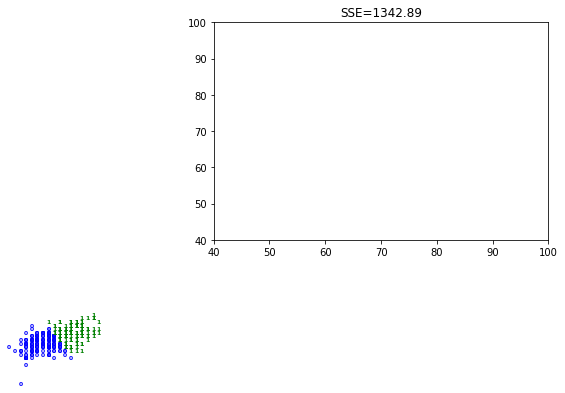

In [47]:
if __name__=="__main__":
    data_X = matz
    k = 2
    kmeans_clf = KMeansClassifier(k)# 实例化KMeansClassifier类
    kmeans_clf.fit(data_X)# 训练模型
    cents = kmeans_clf._centroids
    labels = kmeans_clf._labels
    sse = kmeans_clf._sse
    colors = ['b','g','r','k','c','m','y','#e24fff','#524C90','#845868']
    for i in range(k):
        index = np.nonzero(labels==i)[0]
        x0 = data_X[index, 0]
        x1 = data_X[index, 1]
        y_i = i
        for j in range(len(x0)):
            plt.text(x0[j], x1[j], str(y_i), color=colors[i], \
                        fontdict={'weight': 'bold', 'size': 6})
        plt.scatter(cents[i,0],cents[i,1],marker='x',color=colors[i],\
                    linewidths=7)
    
    plt.title("SSE={:.2f}".format(sse)) #误差平方和
    plt.axis([40,100,40,100])
    outname = "./result/k_clusters" + str(k) + ".png"
    plt.savefig(outname)
    plt.show()

In [35]:
import sys
print(sys.path[3])

C:\Users\besta\Anaconda3\lib
